##### step 1. 헌법 말뭉치

In [1]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [2]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


##### step 2. 법안 말뭉치

In [3]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [4]:
d = kobill.open('1809890.txt').read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



##### step 3. 형태소 분석기 생성

In [5]:
from konlpy.tag import *

hannanum = Hannanum()    # 성능이 좋음
kkma = Kkma()            # 성능이 좋음
okt = Okt()              # 속도가 빠름

# 다음 형태소 분석기는 자바 등의 연결에 따라 안될 수도 있다.
# komoran = Komoran()
# mecab = Mecab()

##### step 4. 명사 추출

In [6]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [7]:
# 꼬꼬마: N-gram 방식
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [8]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

##### step 5. 형태소 추출

In [9]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [10]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [11]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

##### step 6. 품사 부착

In [12]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [13]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [14]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [15]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [16]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [17]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [19]:
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
# tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
# tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
# tagsets["Mecab-기호"] = list(mecab.tagset.keys()) + list("*" * (N - len(mecab.tagset)))
# tagsets["Mecab-품사"] = list(mecab.tagset.values()) + list("*" * (N - len(mecab.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,Determiner,관형사
...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*
63,*,*,XR,어근,*,*
64,*,*,XSA,형용사 파생 접미사,*,*
65,*,*,XSN,명사파생 접미사,*,*


##### step 7. 빈도 분석

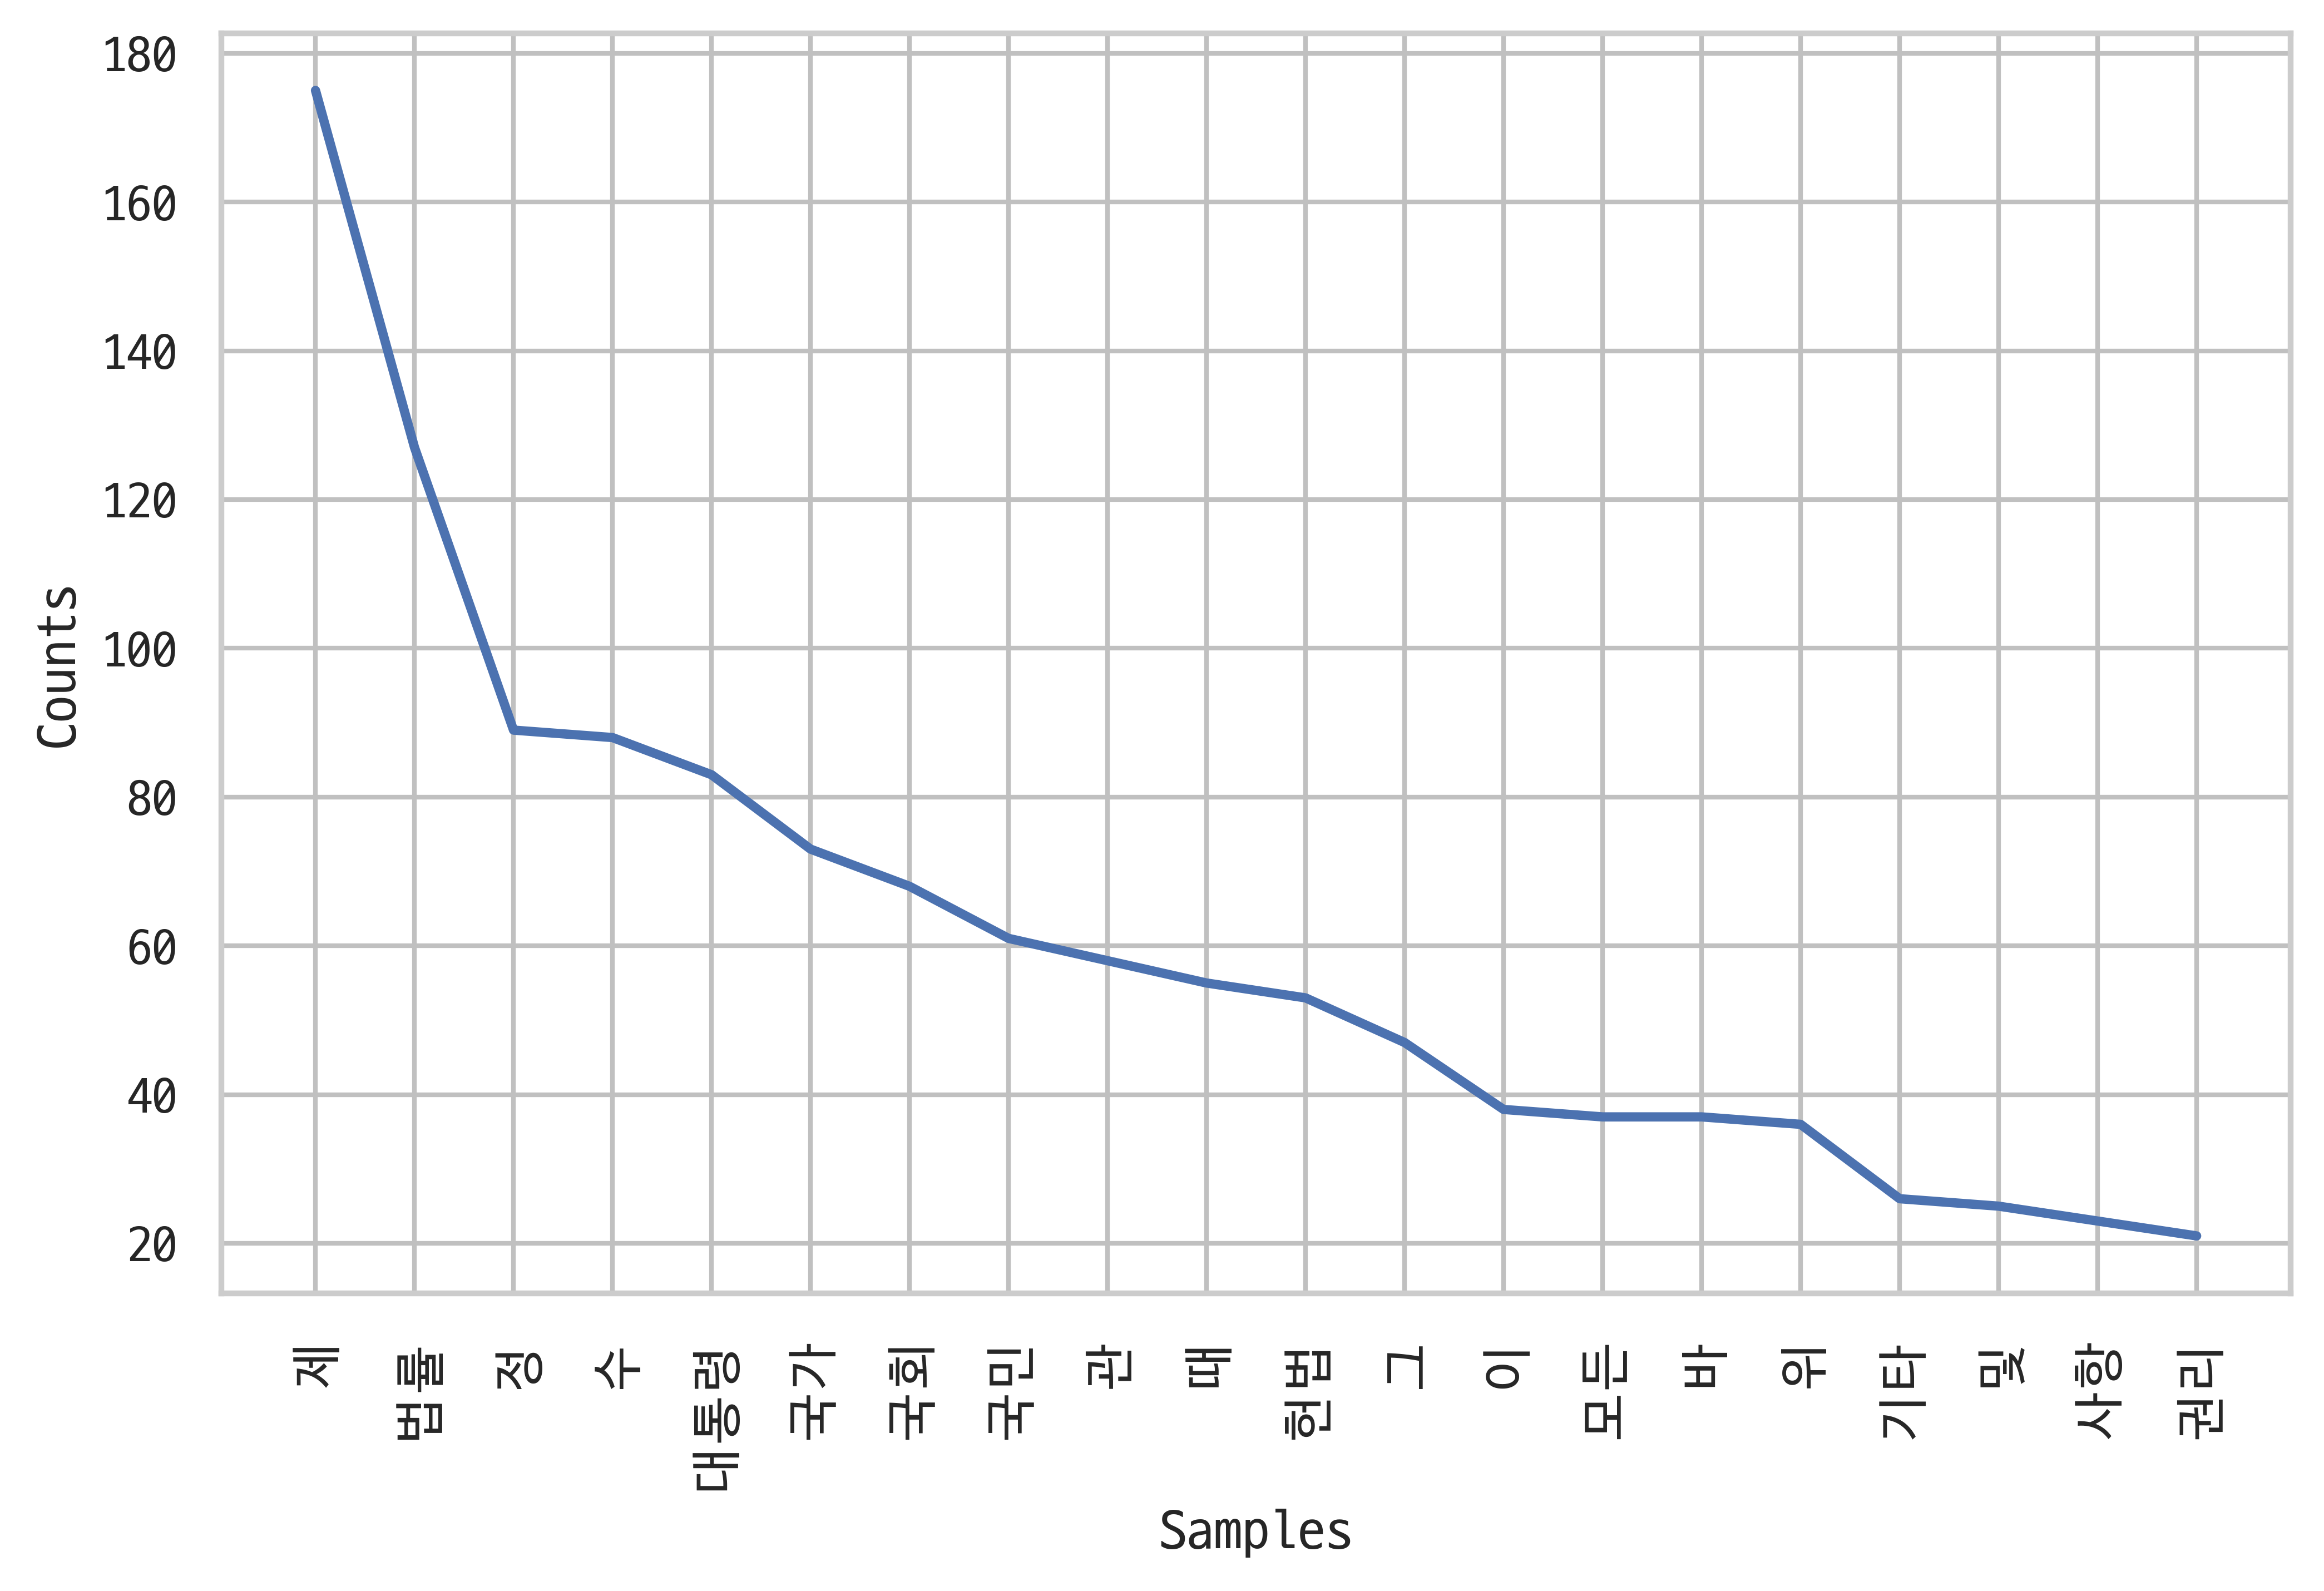

In [24]:
from nltk import Text

kolaw = Text(okt.nouns(c))
kolaw.plot(20)
plt.show()

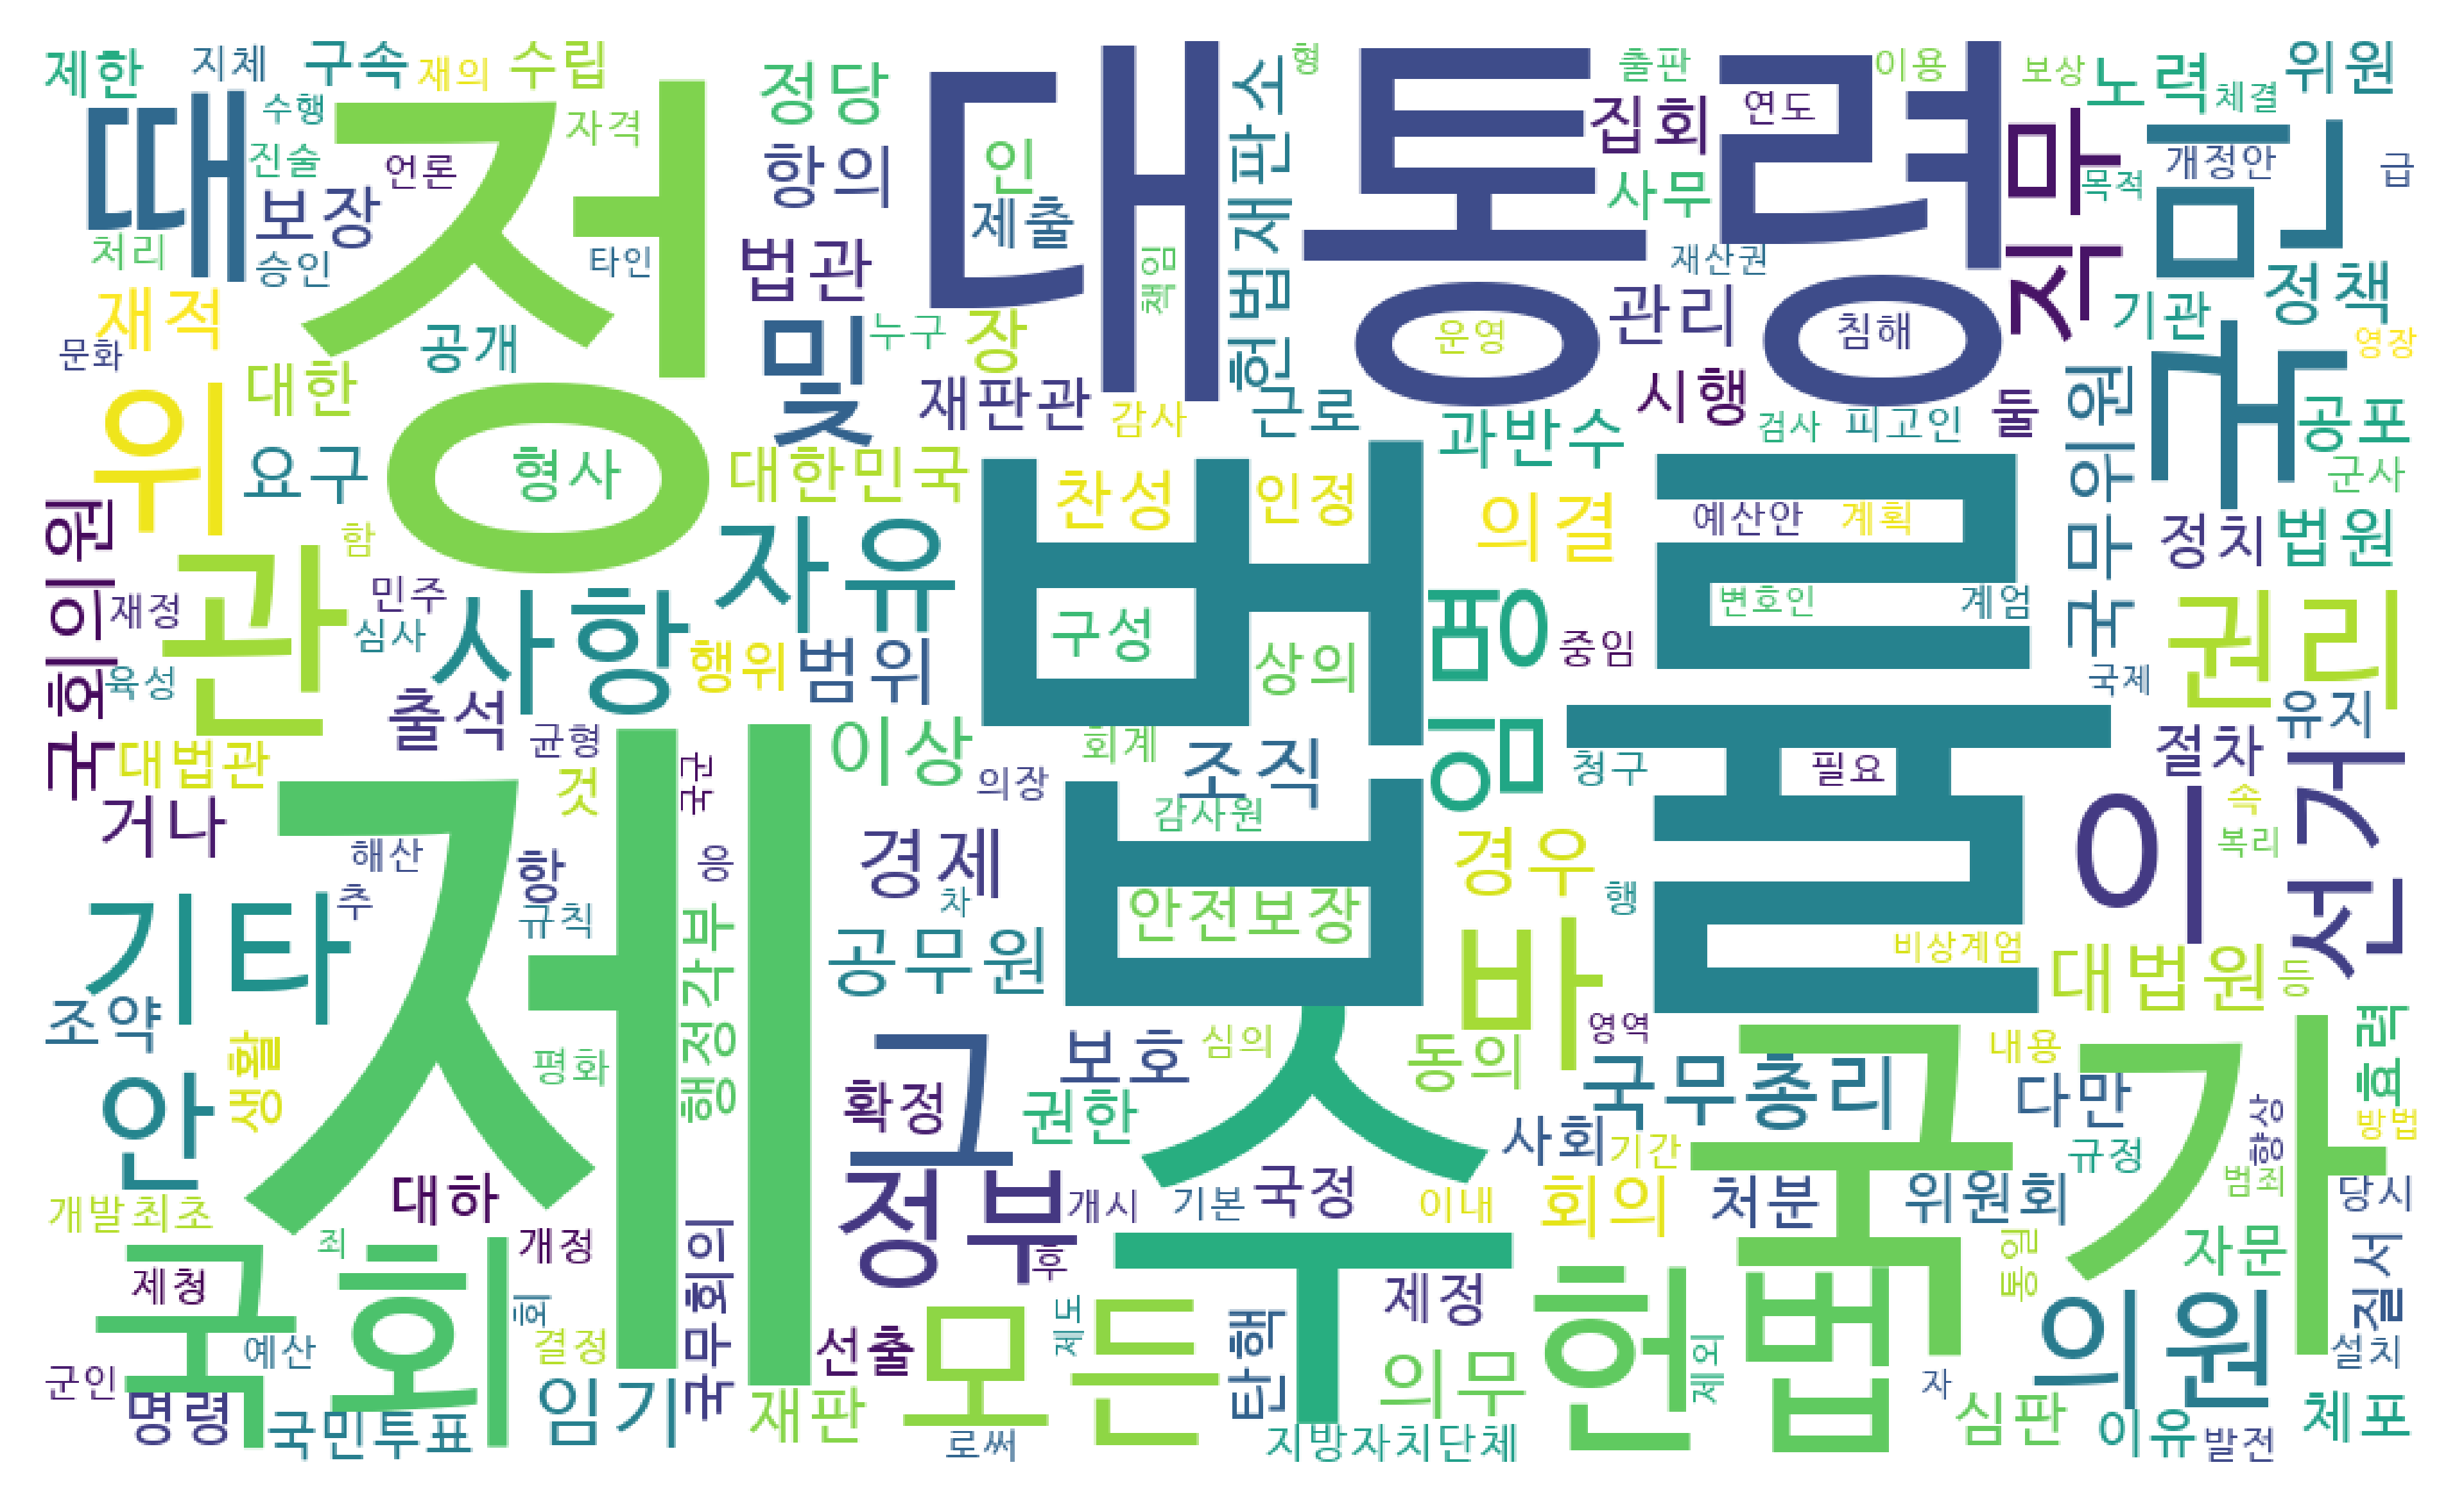

In [31]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 ttf 폰드 경로를 설정
font_path = 'C:\Windows\Fonts\D2Coding.ttc'

wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()